# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
%matplotlib inline

# Business Case


In [2]:
2)city: advertisement city (location where vehicle is sold)
3)ssembly: imported or not (local)
4)body: body type of vehicle
5)make: manufacturer of vehicle
6)model: model variant of vehicle
7)year: year of production
8)transmission: Auto/Manual
9)engine_CC: engine volume of vehicle
10)fuel type: petrol, diesel of hybrid
11)color: color of vehicle
12)registered: registration number city/province of vehicle
13)mileage: mileage in kms
14)price: price of vehicle in PKR

SyntaxError: unmatched ')' (3927927740.py, line 1)

# Readind data

In [3]:
df=pd.read_csv('D:\pakwheels_used_car_data_v02.csv')
df.head(10)

,addref,city,assembly,body,make,model,year,engine,transmission,fuel,color,registered,mileage,price
0,7943732,Peshawar,NaN,Sedan,Toyota,Corolla,2013.0,1300.0,Manual,Petrol,Silver Metallic,Lahore,145000,2870000.0
1,7730314,Lahore,NaN,Sedan,Honda,City,2000.0,1300.0,Manual,Petrol,Blue,Lahore,230000,995000.0
2,7943737,Lahore,NaN,Sedan,Toyota,Yaris,2021.0,1300.0,Manual,Petrol,Super White,Punjab,60500,3585000.0
3,7943733,Lahore,NaN,Hatchback,Suzuki,Swift,2017.0,1300.0,Manual,Petrol,Grey,Islamabad,87000,2250000.0
4,7923484,Lahore,NaN,Sedan,Honda,Civic,2017.0,1800.0,Automatic,Petrol,Grey,Lahore,86000,4850000.0
5,7943736,Vehari,Imported,Sedan,Honda,Civic,2010.0,1300.0,Automatic,Petrol,Albastar Silver,Punjab,157000,2850000.0
6,7764683,Islamabad,NaN,Hatchback,Suzuki,Swift,2019.0,1300.0,Manual,Petrol,Grey,Islamabad,45000,2675000.0
7,7943739,Faisalabad,NaN,Sedan,Honda,City,2018.0,1300.0,Automatic,Petrol,Maroon,Lahore,187000,3450000.0
8,7894559,Lahore,Imported,Hatchback,Daihatsu,Move,2019.0,660.0,Automatic,Petrol,Fire Quartz Red,Un-Registered,22517,3850000.0
9,7943724,Lahore,NaN,Sedan,Honda,City,2014.0,1300.0,Manual,Petrol,Crystal Black Pearl,Lahore,110000,2585000.0


In [4]:
df.shape

(77878, 14)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77878 entries, 0 to 77877
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   addref        77878 non-null  int64  
 1   city          77878 non-null  object 
 2   assembly      24189 non-null  object 
 3   body          68974 non-null  object 
 4   make          77878 non-null  object 
 5   model         77878 non-null  object 
 6   year          73099 non-null  float64
 7   engine        77875 non-null  float64
 8   transmission  77878 non-null  object 
 9   fuel          76972 non-null  object 
 10  color         76398 non-null  object 
 11  registered    77878 non-null  object 
 12  mileage       77878 non-null  int64  
 13  price         77295 non-null  float64
dtypes: float64(3), int64(2), object(9)
memory usage: 8.3+ MB


# Data Summary

In [6]:
round(df.describe())

,addref,year,engine,mileage,price
count,77878.0,73099.0,77875.0,77878.0,77295.0
mean,7809878.0,2013.0,1408.0,91109.0,3883232.0
std,259952.0,8.0,704.0,89275.0,5759480.0
min,274897.0,1990.0,3.0,1.0,110000.0
25%,7805760.0,2007.0,1000.0,34000.0,1450000.0
50%,7865805.0,2015.0,1300.0,80000.0,2700000.0
75%,7910334.0,2019.0,1600.0,123456.0,4500000.0
max,7943741.0,2022.0,15000.0,1000000.0,529000000.0


# Analysis Questions

# 1-what are the Average Car Prices by Year of Production?

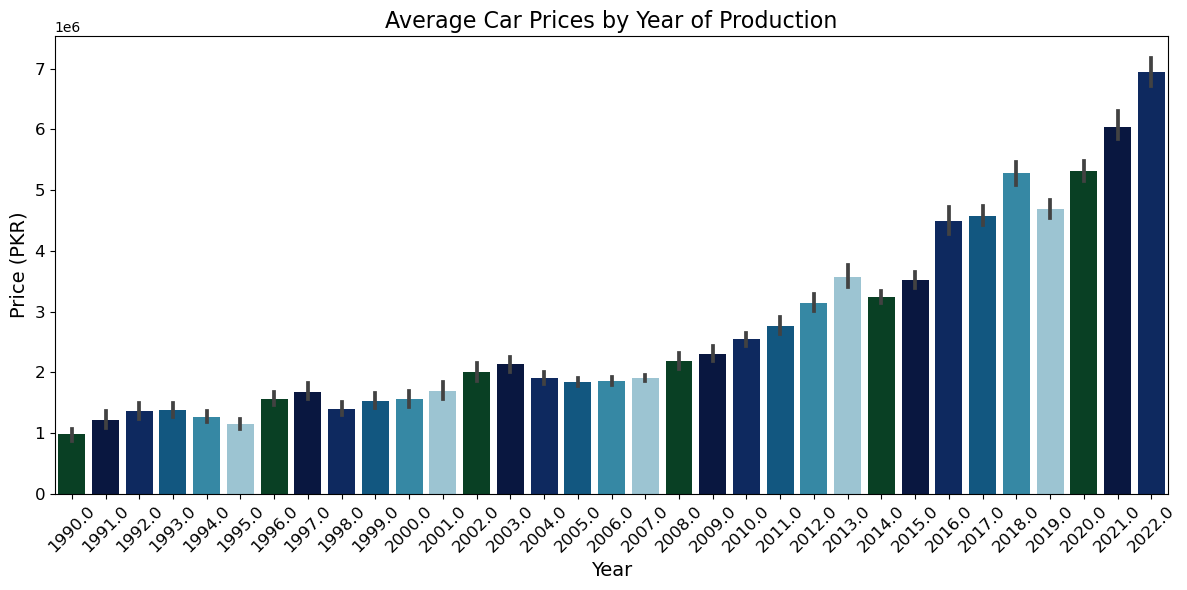

In [7]:
custom_colors = sns.color_palette("ocean")
plt.figure(figsize=(12, 6))
sns.barplot(x='year', y='price', data=df, palette=custom_colors)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Price (PKR)', fontsize=14)
plt.title('Average Car Prices by Year of Production', fontsize=16)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

## 2-what is the Average  Price by Car Make?

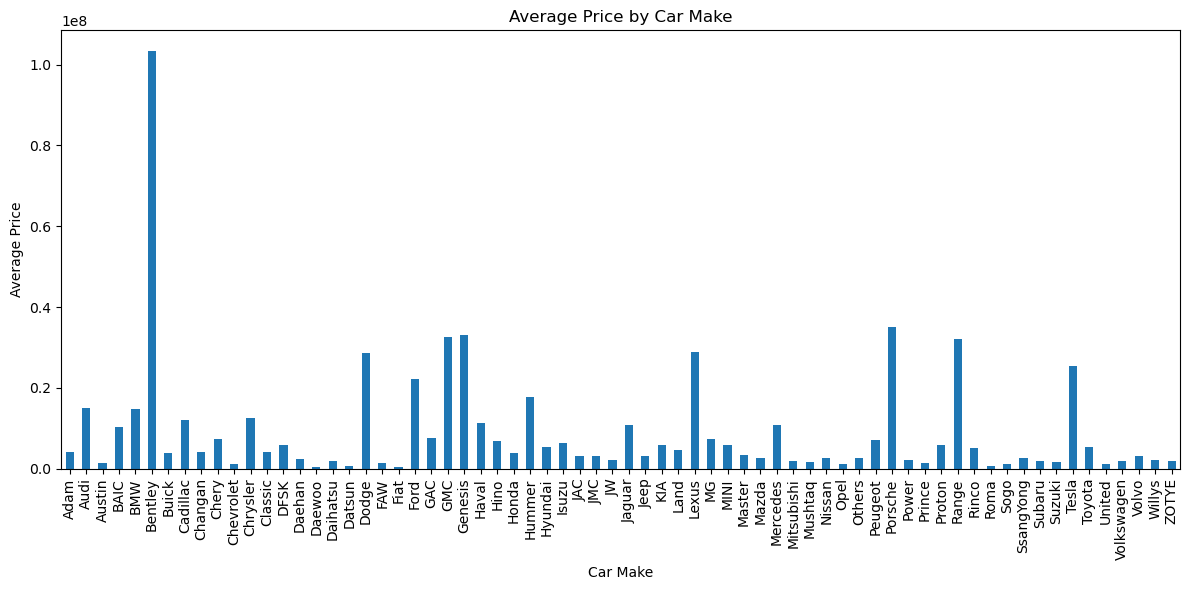

In [8]:
make_avg_price = df.groupby('make')['price'].mean()
plt.figure(figsize=(12, 6))
make_avg_price.plot(kind='bar')
plt.xlabel('Car Make')
plt.ylabel('Average Price')
plt.title('Average Price by Car Make')
plt.xticks(rotation=90)
plt.tight_layout()

# 3-what is The most expensive make and model?

In [9]:
make_model_avg_prices = df.groupby(['make', 'model'])['price'].mean().sort_values(ascending=False)
expensive_make_model = make_model_avg_prices.idxmax()
print(f"The most expensive make and model is {expensive_make_model}")

The most expensive make and model is ('Bentley', 'Mulsanne')


# 4-what is Average Car Prices by Fuel Type ?

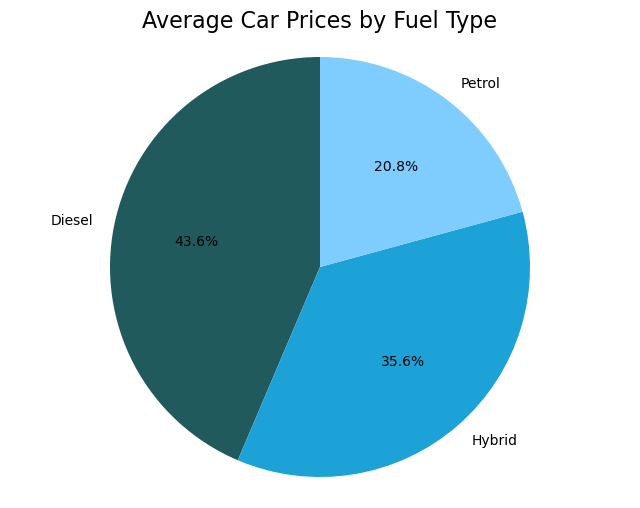

In [10]:
fuel_prices = df.groupby('fuel')['price'].mean().reset_index()
colors = ['#215a5c', '#1da2d8', '#7fcdff']
plt.figure(figsize=(8, 6))
plt.pie(fuel_prices['price'], labels=fuel_prices['fuel'], autopct='%1.1f%%', colors=colors, startangle=90)
plt.title('Average Car Prices by Fuel Type', fontsize=16)
plt.axis('equal')
plt.show()

# 5-What is the most commonly used fuel?


Text(0.5, 1.0, 'the most commonly used fuel')

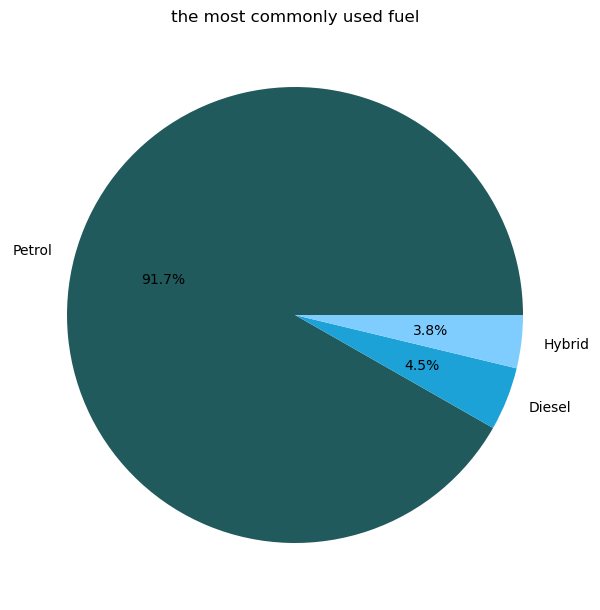

In [12]:
fuel_count = df['fuel'].value_counts().reset_index()
colors = ['#215a5c', '#1da2d8', '#7fcdff']
plt.figure(figsize=(12,6))
plt.pie(x='fuel', labels='index', autopct="%.1f%%", data=fuel_count,colors=colors)
plt.tight_layout()
plt.title('the most commonly used fuel')

# 6-what is Average Car Prices by transmission Type ?

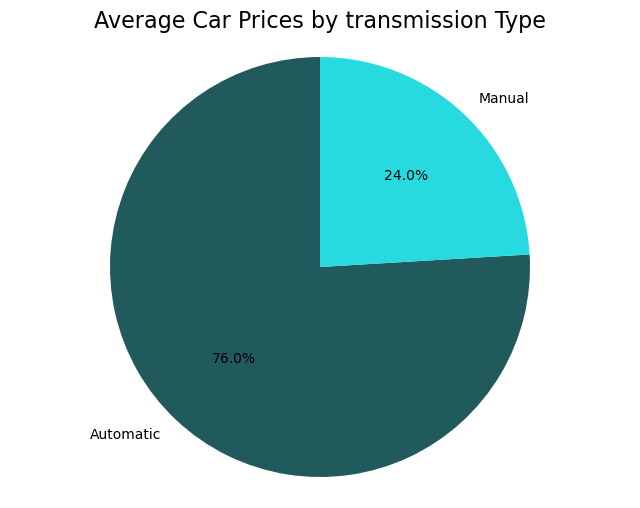

In [13]:

transmission_prices = df.groupby('transmission')['price'].mean().reset_index()
colors = ['#215a5c', '#26dae0']
plt.figure(figsize=(8, 6))
plt.pie(transmission_prices['price'], labels=transmission_prices['transmission'], autopct='%1.1f%%', colors=colors, startangle=90)
plt.title('Average Car Prices by transmission Type', fontsize=16)
plt.axis('equal')
plt.show()

# 7-What are the Most Common Car Models?

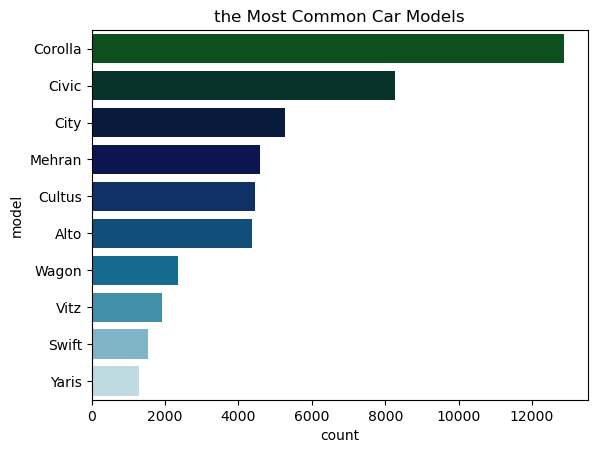

In [14]:
plt.title('the Most Common Car Models')
sns.countplot(data=df, y='model', order=df['model'].value_counts().nlargest(10).index, palette='ocean');

# 8-What are Most Common Body Types?


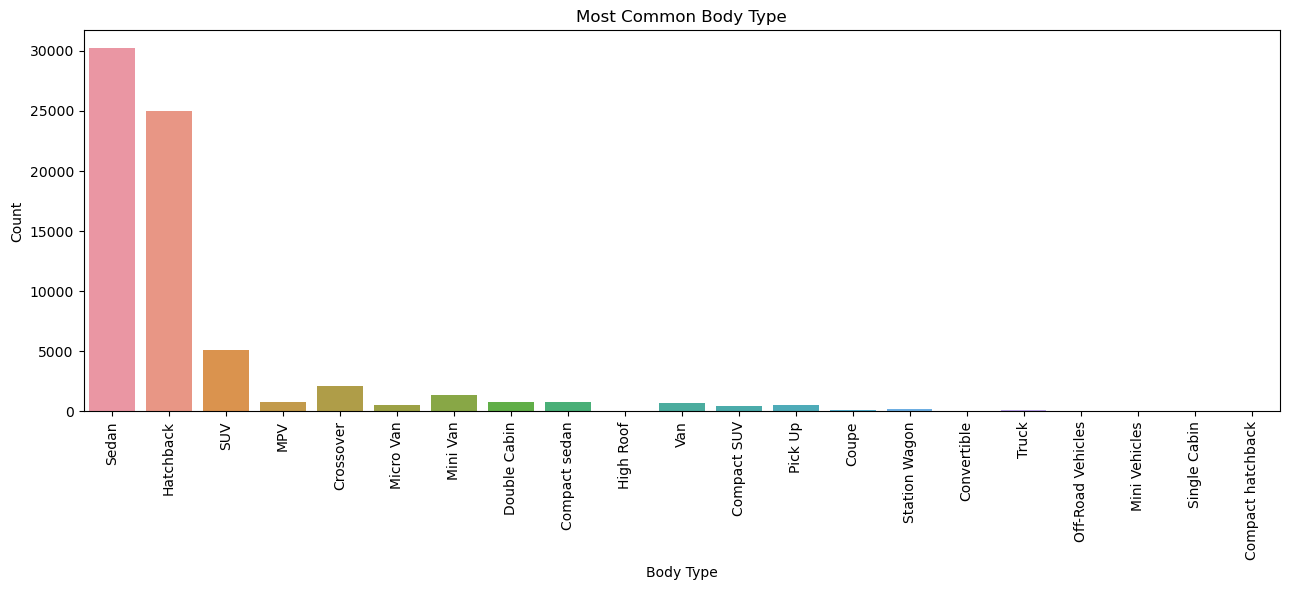

In [15]:
plt.figure(figsize=(13,6))
sns.countplot(df, x='body')
plt.xticks(rotation=90)
plt.title('Most Common Body Type')
plt.xlabel('Body Type')
plt.ylabel('Count')
plt.tight_layout()

# 9-what is Average Engine Displacement by Car Make?


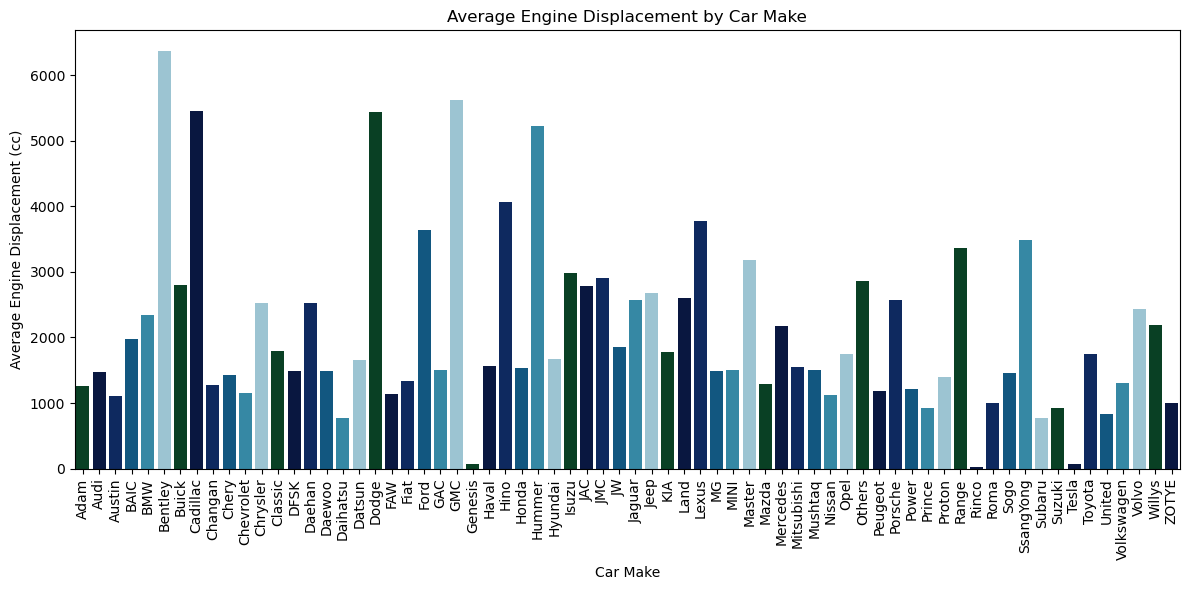

In [16]:
engine_make_avg = df.groupby(['make'])['engine'].mean().reset_index()
custom_colors = sns.color_palette("ocean")
plt.figure(figsize=(12,6))
sns.barplot(x='make', y='engine', data=engine_make_avg,palette=custom_colors)
plt.xticks(rotation=90)
plt.xlabel('Car Make')
plt.ylabel('Average Engine Displacement (cc)')
plt.title('Average Engine Displacement by Car Make')
plt.tight_layout()

# 10- Which cities have the highest and lowest average car prices?


In [17]:
city_avg_prices = df.groupby('city')['price'].mean().sort_values(ascending=False)
highest_avg_price_city = city_avg_prices.idxmax()
lowest_avg_price_city = city_avg_prices.idxmin()
print(f"The city with the highest average car price is {highest_avg_price_city}")
print(f"The city with the lowest average car price is {lowest_avg_price_city}")

The city with the highest average car price is Gwadar
The city with the lowest average car price is Pishin


# 11- Average mileage of listed cars


In [18]:
average_mileage = df['mileage'].mean()
print(f"The average mileage of listed cars is {average_mileage:.2f} kms")

The average mileage of listed cars is 91109.19 kms


<Axes: >

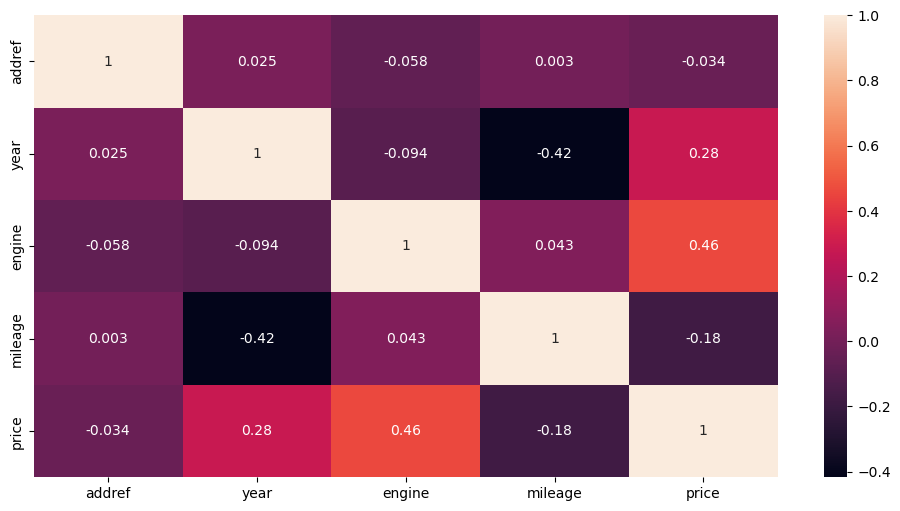

In [19]:
df_num = df.select_dtypes(include='number')
plt.figure(figsize =[12,6])
sns.heatmap(df_num.corr(),annot=True)

In [20]:
correlation = df['engine'].corr(df['price'])
print(f"There is a correlation between engine volume (engine) and car price with a correlation coefficient of {correlation:.2f}")


There is a correlation between engine volume (engine) and car price with a correlation coefficient of 0.46


# 12- what are the top color?

In [21]:
top_colors = df['color'].value_counts().head(5)

In [22]:
print("The most popular car colors in the dataset are:")
for color, count in top_colors.items():
    print(f"- {color}: {count} vehicles")

The most popular car colors in the dataset are:
- White: 21444 vehicles
- Silver: 8173 vehicles
- Black: 7014 vehicles
- Grey: 4173 vehicles
- Solid White: 4073 vehicles


# Handel missing values

In [23]:
df.isna().sum()

addref              0
city                0
assembly        53689
body             8904
make                0
model               0
year             4779
engine              3
transmission        0
fuel              906
color            1480
registered          0
mileage             0
price             583
dtype: int64

In [24]:
df['assembly'].fillna('Local', inplace=True)

In [25]:
assembly_prices = df.groupby(['assembly'])['price'].mean().reset_index()

Text(0, 0.5, 'Car Prices')

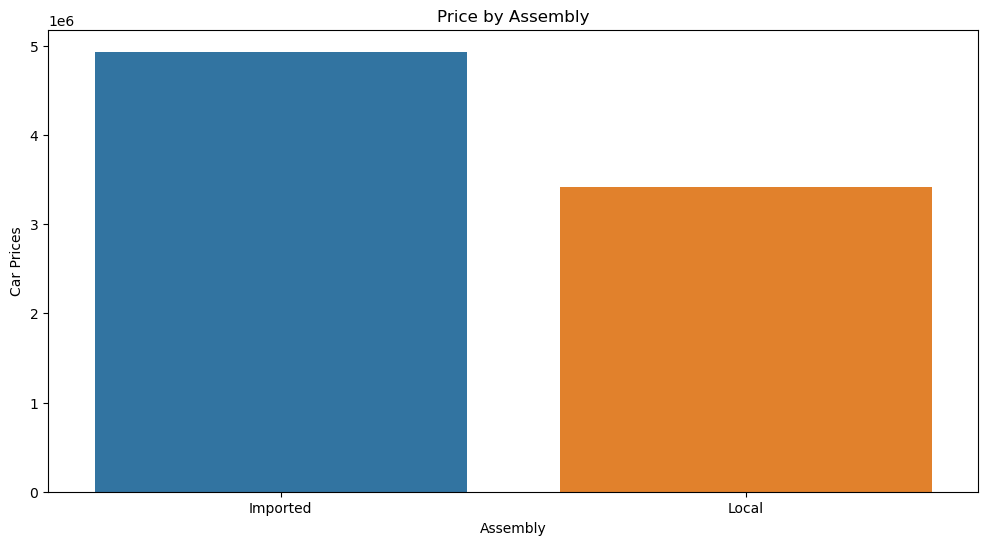

In [26]:
plt.figure(figsize=(12,6))
sns.barplot(x='assembly', y='price', data=assembly_prices)
plt.title('Price by Assembly')
plt.xlabel('Assembly')
plt.ylabel('Car Prices')

In [27]:
df['body'].value_counts()

Sedan                30193
Hatchback            25014
SUV                   5087
Crossover             2156
Mini Van              1337
Compact sedan          793
MPV                    786
Double Cabin           779
Van                    716
Micro Van              539
Pick Up                521
Compact SUV            476
Station Wagon          230
Coupe                   90
Truck                   86
High Roof               74
Convertible             47
Single Cabin            26
Off-Road Vehicles       12
Mini Vehicles            8
Compact hatchback        4
Name: body, dtype: int64

In [28]:
df['body'].fillna(method='ffill',inplace = True)

In [29]:
df['engine'].fillna(method='ffill',inplace = True)
df['year'].fillna(method='ffill',inplace = True)
df['color'].fillna(method='ffill',inplace = True)
df['fuel'].fillna(method='bfill',inplace = True)
df['price'].fillna(df['price'].mean(),inplace = True)

In [30]:
df.isna().sum()

addref          0
city            0
assembly        0
body            0
make            0
model           0
year            0
engine          0
transmission    0
fuel            0
color           0
registered      0
mileage         0
price           0
dtype: int64

# Handel Outliers

<Axes: >

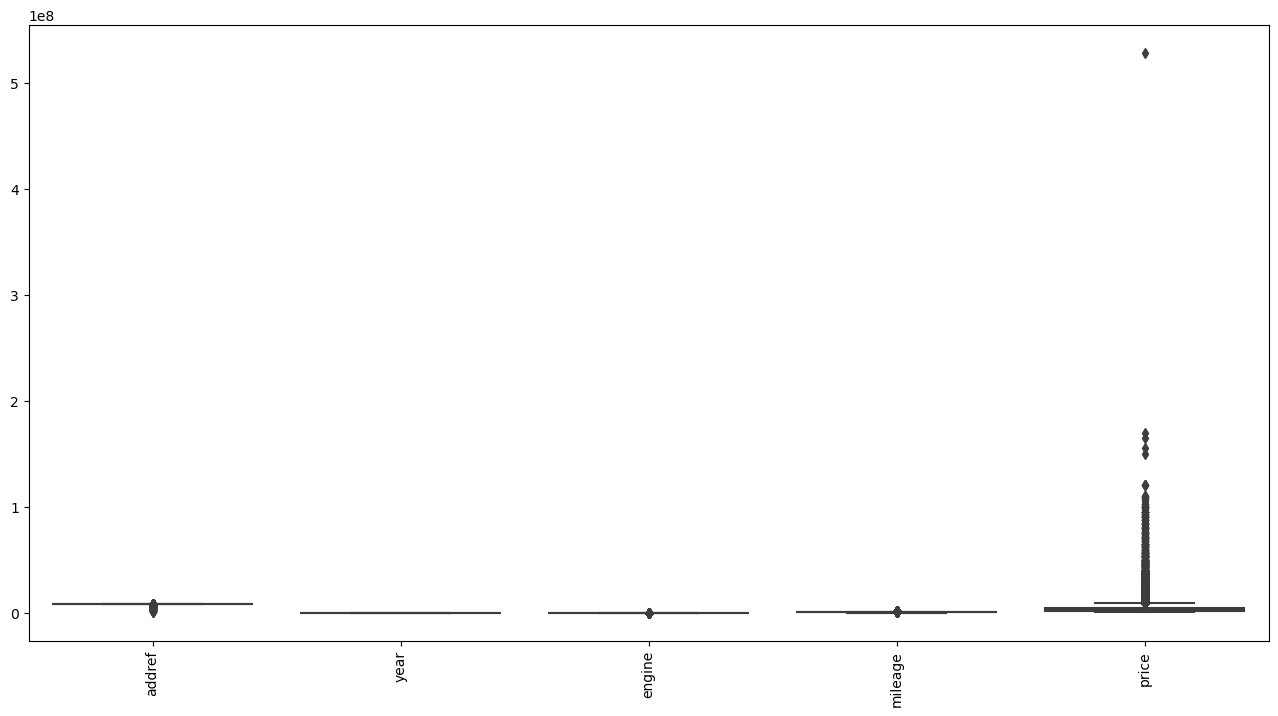

In [31]:
plt.figure(figsize=[16,8])
plt.xticks(rotation = 90)
sns.boxplot(data = df)

In [32]:
! pip install datasist

Defaulting to user installation because normal site-packages is not writeable


In [32]:
from datasist.structdata import detect_outliers
index = detect_outliers(df , 0 , ['price'])
len(index)

4313

In [33]:
df.shape

(77878, 14)

In [34]:
df.drop(index,inplace=True)

# Split data into input and output

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73565 entries, 0 to 77877
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   addref        73565 non-null  int64  
 1   city          73565 non-null  object 
 2   assembly      73565 non-null  object 
 3   body          73565 non-null  object 
 4   make          73565 non-null  object 
 5   model         73565 non-null  object 
 6   year          73565 non-null  float64
 7   engine        73565 non-null  float64
 8   transmission  73565 non-null  object 
 9   fuel          73565 non-null  object 
 10  color         73565 non-null  object 
 11  registered    73565 non-null  object 
 12  mileage       73565 non-null  int64  
 13  price         73565 non-null  float64
dtypes: float64(3), int64(2), object(9)
memory usage: 8.4+ MB


In [36]:
X = df.drop('price' , axis = 1)
y = df['price'] 

# dealing with categorical data

In [37]:
X = pd.get_dummies(X , drop_first = True)
X

,addref,year,engine,mileage,city_Abdul,city_Adda,city_Ahmed,city_Akora,city_Ali,city_Alipur,...,registered_Swabi,registered_Swat,registered_Tando Allah Yar,registered_Thatta,registered_Toba Tek Singh,registered_Un-Registered,registered_Vehari,registered_Wah cantt,registered_Wazirabad,registered_Zafarwal
0,7943732,2013.0,1300.0,145000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,7730314,2000.0,1300.0,230000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,7943737,2021.0,1300.0,60500,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,7943733,2017.0,1300.0,87000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,7923484,2017.0,1800.0,86000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77873,7775164,2019.0,1800.0,58000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
77874,7772775,2015.0,660.0,65000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
77875,7773716,2021.0,1490.0,5000,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
77876,7322377,2005.0,1300.0,19000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Split data into train and test

In [38]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)

# feature scaling

In [39]:
x_train

,addref,year,engine,mileage,city_Abdul,city_Adda,city_Ahmed,city_Akora,city_Ali,city_Alipur,...,registered_Swabi,registered_Swat,registered_Tando Allah Yar,registered_Thatta,registered_Toba Tek Singh,registered_Un-Registered,registered_Vehari,registered_Wah cantt,registered_Wazirabad,registered_Zafarwal
4019,7940622,2002.0,2000.0,123000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
56461,7845597,2017.0,1300.0,199456,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
25389,7913893,2006.0,1000.0,120000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2635,7941896,2014.0,1300.0,105700,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15231,7728432,2003.0,1500.0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39812,7884928,2017.0,1000.0,84000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6784,7751697,2017.0,1300.0,103000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
58374,7302597,2018.0,1300.0,80000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
932,7870453,2015.0,1300.0,64262,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [40]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train_scaled = sc.fit_transform(x_train)
x_test_scaled = sc.transform(x_test)

In [41]:
x_train_scaled = pd.DataFrame(x_train_scaled , columns = sc.get_feature_names_out())
x_train_scaled

,addref,year,engine,mileage,city_Abdul,city_Adda,city_Ahmed,city_Akora,city_Ali,city_Alipur,...,registered_Swabi,registered_Swat,registered_Tando Allah Yar,registered_Thatta,registered_Toba Tek Singh,registered_Un-Registered,registered_Vehari,registered_Wah cantt,registered_Wazirabad,registered_Zafarwal
0,0.490355,-1.404703,1.109094,0.322980,-0.014864,-0.004122,-0.02704,-0.021424,-0.004122,-0.016491,...,-0.00583,-0.02474,-0.004122,-0.004122,-0.00714,-0.235482,-0.016491,-0.00583,-0.004122,-0.004122
1,0.130758,0.586056,-0.056404,1.169671,-0.014864,-0.004122,-0.02704,-0.021424,-0.004122,-0.016491,...,-0.00583,-0.02474,-0.004122,-0.004122,-0.00714,-0.235482,-0.016491,-0.00583,-0.004122,-0.004122
2,0.389206,-0.873834,-0.555903,0.289757,-0.014864,-0.004122,-0.02704,-0.021424,-0.004122,-0.016491,...,-0.00583,-0.02474,-0.004122,-0.004122,-0.00714,-0.235482,-0.016491,-0.00583,-0.004122,-0.004122
3,0.495176,0.187904,-0.056404,0.131395,-0.014864,-0.004122,-0.02704,-0.021424,-0.004122,-0.016491,...,-0.00583,-0.02474,-0.004122,-0.004122,-0.00714,-0.235482,-0.016491,-0.00583,-0.004122,-0.004122
4,-0.312623,-1.271986,0.276595,-1.039140,-0.014864,-0.004122,-0.02704,-0.021424,-0.004122,-0.016491,...,-0.00583,-0.02474,-0.004122,-0.004122,-0.00714,4.246603,-0.016491,-0.00583,-0.004122,-0.004122
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58847,0.279596,0.586056,-0.555903,-0.108915,-0.014864,-0.004122,-0.02704,-0.021424,-0.004122,-0.016491,...,-0.00583,-0.02474,-0.004122,-0.004122,-0.00714,-0.235482,-0.016491,-0.00583,-0.004122,-0.004122
58848,-0.224583,0.586056,-0.056404,0.101495,-0.014864,-0.004122,-0.02704,-0.021424,-0.004122,-0.016491,...,-0.00583,-0.02474,-0.004122,-0.004122,-0.00714,-0.235482,-0.016491,-0.00583,-0.004122,-0.004122
58849,-1.924087,0.718773,-0.056404,-0.153212,-0.014864,-0.004122,-0.02704,-0.021424,-0.004122,-0.016491,...,-0.00583,-0.02474,-0.004122,-0.004122,-0.00714,-0.235482,-0.016491,-0.00583,-0.004122,-0.004122
58850,0.224819,0.320621,-0.056404,-0.327499,-0.014864,-0.004122,-0.02704,-0.021424,-0.004122,-0.016491,...,-0.00583,-0.02474,-0.004122,-0.004122,-0.00714,-0.235482,-0.016491,-0.00583,-0.004122,-0.004122


In [42]:
x_test_scaled = pd.DataFrame(x_test_scaled , columns = sc.get_feature_names_out())
x_test_scaled

,addref,year,engine,mileage,city_Abdul,city_Adda,city_Ahmed,city_Akora,city_Ali,city_Alipur,...,registered_Swabi,registered_Swat,registered_Tando Allah Yar,registered_Thatta,registered_Toba Tek Singh,registered_Un-Registered,registered_Vehari,registered_Wah cantt,registered_Wazirabad,registered_Zafarwal
0,0.153800,1.249642,1.109094,-0.861963,-0.014864,-0.004122,-0.02704,-0.021424,-0.004122,-0.016491,...,-0.00583,-0.02474,-0.004122,-0.004122,-0.00714,-0.235482,-0.016491,-0.00583,-0.004122,-0.004122
1,0.059538,-0.741117,-0.222904,-0.518662,-0.014864,-0.004122,-0.02704,-0.021424,-0.004122,-0.016491,...,-0.00583,-0.02474,-0.004122,-0.004122,-0.00714,-0.235482,-0.016491,-0.00583,-0.004122,-0.004122
2,-0.086617,1.249642,1.109094,-0.884112,-0.014864,-0.004122,-0.02704,-0.021424,-0.004122,-0.016491,...,-0.00583,-0.02474,-0.004122,-0.004122,-0.00714,-0.235482,-0.016491,-0.00583,-0.004122,-0.004122
3,0.183290,0.984208,-1.122002,-0.263955,-0.014864,-0.004122,-0.02704,-0.021424,-0.004122,-0.016491,...,-0.00583,-0.02474,-0.004122,-0.004122,-0.00714,4.246603,-0.016491,-0.00583,-0.004122,-0.004122
4,0.089358,-1.537420,-0.056404,0.068272,-0.014864,-0.004122,-0.02704,-0.021424,-0.004122,-0.016491,...,-0.00583,-0.02474,-0.004122,-0.004122,-0.00714,-0.235482,-0.016491,-0.00583,-0.004122,-0.004122
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14708,0.262094,-1.404703,0.276595,-0.902440,-0.014864,-0.004122,-0.02704,-0.021424,-0.004122,-0.016491,...,-0.00583,-0.02474,-0.004122,-0.004122,-0.00714,-0.235482,-0.016491,-0.00583,-0.004122,-0.004122
14709,0.408657,-0.210248,0.776094,0.621984,-0.014864,-0.004122,-0.02704,-0.021424,-0.004122,-0.016491,...,-0.00583,-0.02474,-0.004122,-0.004122,-0.00714,-0.235482,-0.016491,-0.00583,-0.004122,-0.004122
14710,0.123912,-2.731876,-0.888903,2.283119,-0.014864,-0.004122,-0.02704,-0.021424,-0.004122,-0.016491,...,-0.00583,-0.02474,-0.004122,-0.004122,-0.00714,-0.235482,-0.016491,-0.00583,-0.004122,-0.004122
14711,-0.072842,-0.475682,0.776094,0.854543,-0.014864,-0.004122,-0.02704,-0.021424,-0.004122,-0.016491,...,-0.00583,-0.02474,-0.004122,-0.004122,-0.00714,-0.235482,-0.016491,-0.00583,-0.004122,-0.004122


# Handle Imbalance Data